In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("merishnasuwal/breast-cancer-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 7.92k/7.92k [00:00<00:00, 81.2kB/s]

Extracting files...
Path to dataset files: C:\Users\acer\.cache\kagglehub\datasets\merishnasuwal\breast-cancer-prediction-dataset\versions\2


In [2]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_csv("Breast_cancer_data.csv")

# Split into features and target
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values


In [3]:
# Shuffle and split (80% train, 20% test)
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))
train_idx, test_idx = indices[:split], indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


In [4]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.vars = {}
        self.priors = {}
        for c in self.classes:
            X_c = X[y == c]
            self.means[c] = X_c.mean(axis=0)
            self.vars[c] = X_c.var(axis=0) + 1e-9  # To avoid division by zero
            self.priors[c] = X_c.shape[0] / X.shape[0]
    
    def gaussian_prob(self, class_idx, x):
        mean = self.means[class_idx]
        var = self.vars[class_idx]
        numerator = np.exp(- (x - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
    
    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.priors[c])
                conditional = np.sum(np.log(self.gaussian_prob(c, x)))
                posterior = prior + conditional
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return np.array(y_pred)


In [5]:
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


In [6]:
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Simple classification report
def classification_report_manual(y_true, y_pred):
    for label in np.unique(y_true):
        tp = np.sum((y_pred == label) & (y_true == label))
        fp = np.sum((y_pred == label) & (y_true != label))
        fn = np.sum((y_pred != label) & (y_true == label))
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        print(f"Class {label}: Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

classification_report_manual(y_test, y_pred)


Accuracy: 82.46%
Class 0: Precision: 0.86, Recall: 0.68, F1: 0.76
Class 1: Precision: 0.81, Recall: 0.93, F1: 0.86


In [7]:
import pickle

# Save the model to a file
with open("gnb_model.pkl", "wb") as f:
    pickle.dump(gnb, f)


In [8]:
import pickle

# Load the saved model
with open('gnb_model.pkl', 'rb') as f:
    loaded_gnb = pickle.load(f)


In [9]:
# Predict on test data (assuming X_test is available)
y_pred = loaded_gnb.predict(X_test)


In [10]:
# Predict on test data (assuming X_test is available)
y_pred = loaded_gnb.predict(X_test)


In [11]:
import numpy as np

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Optional: Manual classification report
def classification_report_manual(y_true, y_pred):
    for label in np.unique(y_true):
        tp = np.sum((y_pred == label) & (y_true == label))
        fp = np.sum((y_pred == label) & (y_true != label))
        fn = np.sum((y_pred != label) & (y_true == label))
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        print(f"Class {label}: Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

classification_report_manual(y_test, y_pred)


Test Accuracy: 82.46%
Class 0: Precision: 0.86, Recall: 0.68, F1: 0.76
Class 1: Precision: 0.81, Recall: 0.93, F1: 0.86


In [14]:
# Example: new_sample is a numpy array with shape (number_of_features,)
new_sample = np.array([[18, 11, 130, 1000, 0.12]])
label_map = {0: "You do not have breast cancer.", 1: "Please contact your doctor."}
prediction = loaded_gnb.predict(new_sample)
print(label_map[prediction[0]])


You do not have breast cancer.


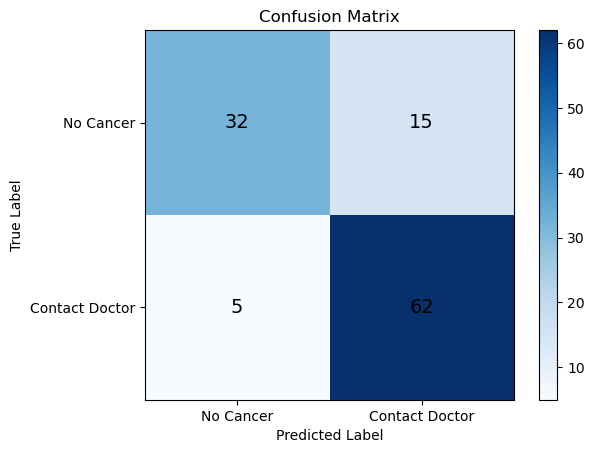

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# y_test and y_pred should be your true and predicted labels

# Create confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    cm = np.zeros((2, 2), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[int(t)][int(p)] += 1

    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap="Blues")

    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)

    # Add numbers in each cell
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="black", fontsize=14)

    plt.colorbar(im)
    plt.show()

labels = ["No Cancer", "Contact Doctor"]
plot_confusion_matrix(y_test, y_pred, labels)


In [16]:
# Predict on training set
y_train_pred = loaded_gnb.predict(X_train)

# Predict on test set
y_test_pred = loaded_gnb.predict(X_test)


In [17]:
# Accuracy on training data
train_accuracy = np.mean(y_train_pred == y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 92.75%
Test Accuracy: 82.46%


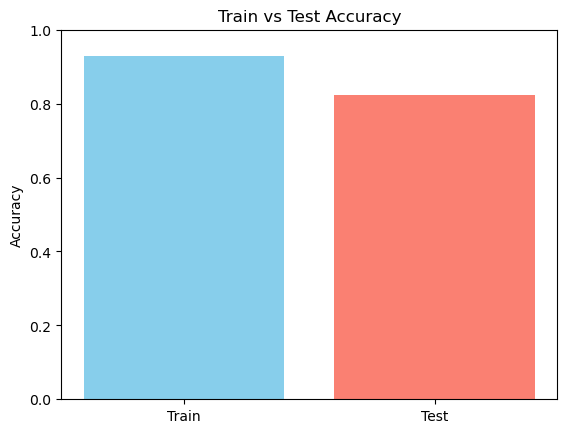

In [18]:
import matplotlib.pyplot as plt

plt.bar(['Train', 'Test'], [train_accuracy, test_accuracy], color=['skyblue', 'salmon'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 1)
plt.show()


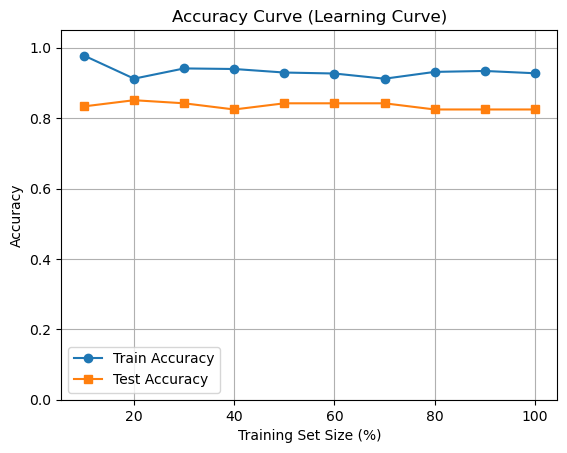

In [19]:
import numpy as np
import matplotlib.pyplot as plt

train_sizes = np.linspace(0.1, 1.0, 10)
train_accuracies = []
test_accuracies = []

for frac in train_sizes:
    # Subset the training data
    size = int(frac * len(X_train))
    X_sub = X_train[:size]
    y_sub = y_train[:size]
    
    # Re-train a new model on this subset
    model = GaussianNaiveBayes()
    model.fit(X_sub, y_sub)
    
    # Train accuracy
    y_sub_pred = model.predict(X_sub)
    train_acc = np.mean(y_sub_pred == y_sub)
    train_accuracies.append(train_acc)
    
    # Test accuracy
    y_test_pred = model.predict(X_test)
    test_acc = np.mean(y_test_pred == y_test)
    test_accuracies.append(test_acc)

# Plot the learning curve
plt.plot(train_sizes * 100, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(train_sizes * 100, test_accuracies, marker='s', label='Test Accuracy')
plt.xlabel("Training Set Size (%)")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve (Learning Curve)")
plt.legend()
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()
